In [ ]:
!pip install tensorflow-gpu

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
# create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the picture) -->
  #Hidden Layer1 (number of neurons) -->
  #H2 (n)-->
  #output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  # pushing it forward layers by layers
  def forward(self, x):
    x = F.relu(self.fc1(x)) # push it to the first layers
    x = F.relu(self.fc2(x)) # push it to the second layers
    x = self.out(x) # push it to the last layer

    return x

In [28]:
#pick a manual seed for randomization
torch.manual_seed(32)
# Create an instance of model
model = Model()

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# upload the dataset from anywhere
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [60]:
# load the dataset
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# changing the names to numbers or change last column to numbers

my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)  # Corrected typo in 'Virginica'
my_df

In [65]:
# Train Test Split! Set X, Y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [ ]:
X

In [ ]:
y

In [37]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [ ]:
X

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [66]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [67]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [69]:
# model = Model()
# Set the critierion of model to measure the error, how far off the predicitions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, learning rate (if error doesn't go down after a bunch of iterations(epochs), lower our learning variable)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
model.parameters

In [ ]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 10000
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measures the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # through the networks to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Text(0.5, 0, 'Epoch')

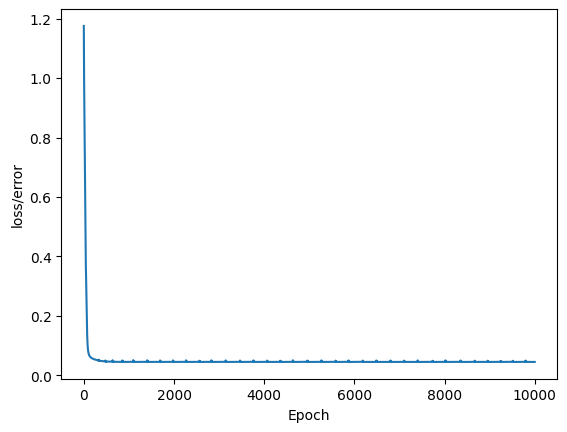

In [46]:
#Graph it out
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [47]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are feature from our test set, y_eval will be propogation
  loss = criterion(y_eval, y_test) # Find the loss or error

In [48]:
loss

tensor(0.0233)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] ==0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Viriginica'

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}. {str(y_val)} \t {x} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

  print(f'We got {correct} correct!')


In [50]:
# Add new data to this dataset
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [51]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-22.4754,   5.0331,   8.2968])


In [53]:
# SAVE OUR MODEL
torch.save(model.state_dict(), 'test_trained_iris_model.h5') # save the file in another file (.pt, .pd etc)

In [54]:
# LOAD THE SAVED MODEL
new_model = Model()
new_model.load_state_dict(torch.load('test_trained_iris_model.h5'))

<All keys matched successfully>

In [55]:
# MAKE SURE IT LOADED CORRECTLY
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [58]:
# Create a zip file
zip_file_path = '/content/test_trained_iris_model.h5.zip'
!zip -r "/content/test_trained_iris_model.h5.zip" "/content/test_trained_iris_model.h5"

updating: content/test_trained_iris_model.h5 (deflated 52%)


In [59]:
# Download the zip file
from google.colab import files
files.download(zip_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>